<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Objective" data-toc-modified-id="Objective-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Objective</a></span></li><li><span><a href="#Variables-in-the-dataset" data-toc-modified-id="Variables-in-the-dataset-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Variables in the dataset</a></span></li></ul></li><li><span><a href="#Sourcing-and-Loading-the-Data" data-toc-modified-id="Sourcing-and-Loading-the-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sourcing and Loading the Data</a></span><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Load the data</a></span></li></ul></li><li><span><a href="#Cleaning,-transforming-and-visualizing-data" data-toc-modified-id="Cleaning,-transforming-and-visualizing-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Cleaning, transforming and visualizing data</a></span><ul class="toc-item"><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Categorical-Variables" data-toc-modified-id="Categorical-Variables-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Categorical Variables</a></span></li><li><span><a href="#Numeric-Features" data-toc-modified-id="Numeric-Features-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Numeric Features</a></span></li></ul></li><li><span><a href="#Data-Wrangling" data-toc-modified-id="Data-Wrangling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Data Wrangling</a></span></li><li><span><a href="#A-visual-Summary" data-toc-modified-id="A-visual-Summary-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>A visual Summary</a></span></li><li><span><a href="#Saving-data" data-toc-modified-id="Saving-data-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Saving data</a></span></li></ul></li></ul></div>

Project: Customer Behavior Analysis  and Prediction

## Introduction

This project is using the dataset ['marketing_campaign.csv'](https://www.kaggle.com/imakash3011/customer-personality-analysis?select=marketing_campaign.csv) from kaggle to analyze the customer personality. The target variable is that customers would accept the offer from the last campaign. It is a very common problem many retailer business is facing to.  The goal is to transform data into insights and help business to make decisions.

###  Objective

To perform EDA of the customer data and implement machine learning models, forecast if a customer would accept the offer in the last champaign.

For each technique and its corresponding model, I will assess its performance by comparing the predicted output with the actual result. Finally, all models will be compared to each other, and we will find out which algorithm works the best.

###  Variables in the dataset

a. Customer information
 - Year_Birth: Customer's birth year
 - Education: Customer's education level
 - Marital_Status: Customer's marital status
 - Income: Customer's yearly household income
 - Kidhome: Number of children in customer's household
 - Teenhome: Number of teenagers in customer's household
 - Dt_Customer: Date of customer's enrollment with the company
 - Complain: if the customer complained in the last 2 years
***
b. Amount spent on products in last 2 years
 - MntWines: Amount spent on wine
 - MntFruits: Amount spent on fruits
 - MntMeatProducts: Amount spent on meat
 - MntFishProducts: Amount spent on fish
 - MntSweetProducts: Amount spent on sweets
 - MntGoldProds: Amount spent on gold
***
c. Places where customers made the purchase
 - NumWebPurchases: Number of purchases made through the company’s website
 - NumCatalogPurchases: Number of purchases made using a catalog
 - NumStorePurchases: Number of purchases made directly in stores
 - NumWebVisitsMonth: Number of visits to company’s website in the last month
***
d. Promotion activities response
 - NumDealsPurchases: Number of purchases made with a discount
 - AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
 - AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
 - AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
 - AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
 - AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
 - Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
 ***
 Target variable:
 - customer would accept the offer in the last campaign or not

## Sourcing and Loading the Data

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from datetime import datetime, date, timedelta
from library.sb_utils import save_file
%matplotlib inline

plt.rcParams.update(plt.rcParamsDefault)
sns.set()

### Load the data

In [2]:
# read data
df = pd.read_csv('./Data/marketing_campaign.csv', sep='\t')

# check the first few rows of data to identify the features (dependent and independent)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
print("The dataset contains: {} customers and {} features: ".format(df.shape[0], df.shape[1]))

The dataset contains: 2240 customers and 29 features: 


In [4]:
# Check null/missing values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
# summary statistics
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


**Initial observations:**
 
 - 'income' has 24 missing values in the dataset
 - the max 'income' 666666 (?) is much higher than the 3rd quantile (75%).
 - the maximum amount spent on 'Wines' and 'Meat' is much larger than that spent on other products. 
 - there are 3 categorical objects
 - 'Dt_Customer' needs to be parsed as datetime data type

## Cleaning, transforming and visualizing data

### Data Cleaning 
 Remove less useful information (Drop columns); 'Z_CostContact' and 'Z_Revenue' are not shown on the variable description. 'Recency' - less significant with little variation

In [7]:
# unused features
print(df['Z_CostContact'].unique())
print(df['Z_Revenue'].unique())

[3]
[11]


In [8]:
# drop features
To_Drop = ['Z_CostContact', 'Z_Revenue']
df.drop(columns=To_Drop, axis=1, inplace=True)

No two columns are too much correlated with each other, so we can't drop any column on the basis of correlation.

####  Categorical Variables 

In [9]:
# 'Education'
df.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

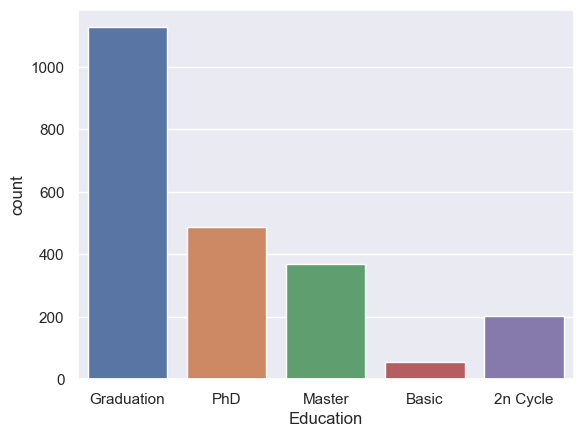

In [10]:
#plot
sns.countplot(x=df.Education)
sns.set(rc={'figure.figsize':(4,4)})
plt.show()

In [11]:
# combine the "Basic" and "2n Cycle" education level into an "Undergraduate" level
df['Education'] = df.Education.replace({"Basic":"Undergrad","2n Cycle":"Undergrad", 
                                            "Graduation":"Undergrad", "Master":"Postgrad","PhD":"Postgrad"})

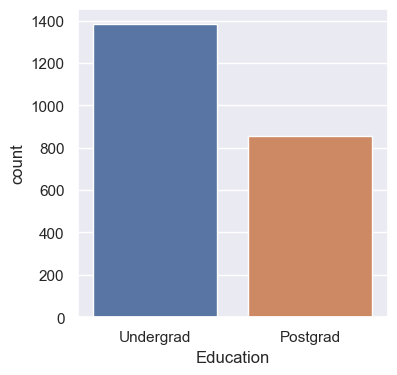

In [12]:
#plot
sns.countplot(x=df.Education)
sns.set(rc={'figure.figsize':(4,4)})
plt.show()

In [13]:
# 'Marital_Status'
df.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

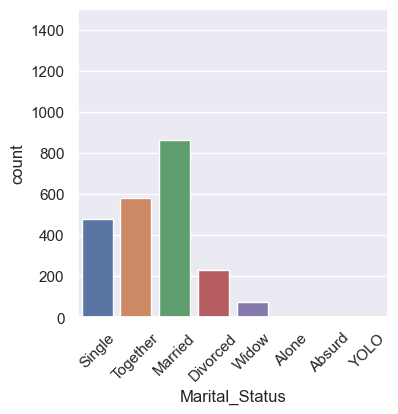

In [14]:
#plot
sns.countplot(x=df.Marital_Status)
sns.set(rc={'figure.figsize':(7,7)})
plt.xticks(rotation='45')
plt.ylim(0,1500)
plt.show();

In [15]:
# use 'single' and 'couple' in relationships
df['Marital_Status'] = df.Marital_Status.replace({"Married":"couple","Together":"couple",
                                             "Absurd":"single","Widow":"single",
                                             "YOLO":"single","Divorced":"single", "Single":"single", "Alone":"single"})

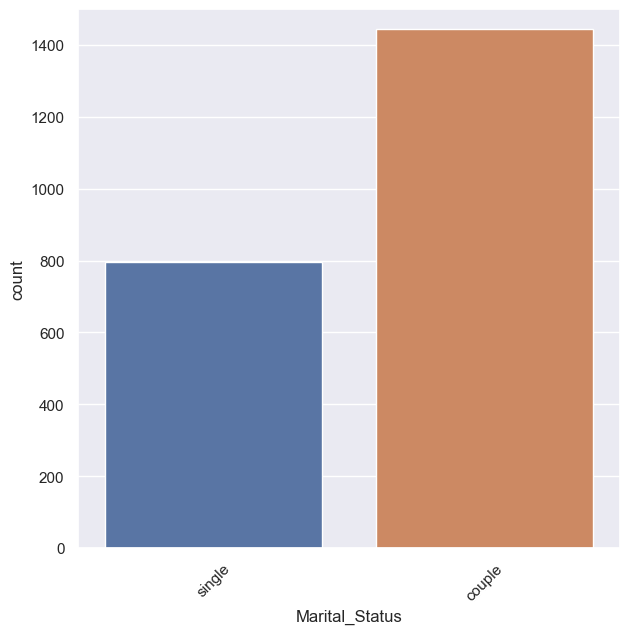

In [16]:
#plot
sns.countplot(x=df.Marital_Status)
sns.set(rc={'figure.figsize':(3,3)})
plt.xticks(rotation='45')
plt.ylim(0,1500)
plt.show();

####  Numeric Features

In [17]:
# 'AcceptedCmp' 1-6: Customers' responses to the marketing champaign 
df.rename(columns={'Response': 'AcceptedCmp6'}, inplace=True)

In [18]:
# Add a new column'Age' at the time of the last campaign
df['Age'] = 2015 - df['Year_Birth']  

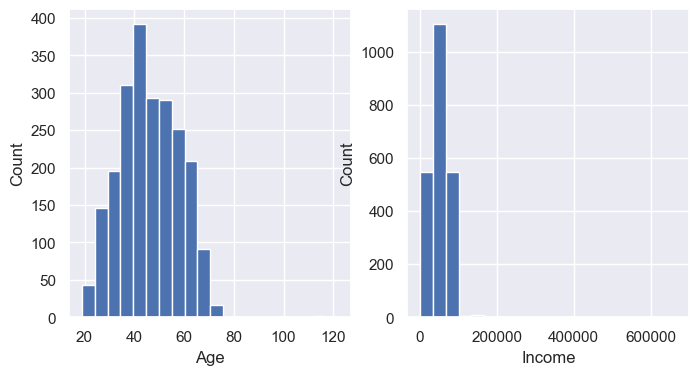

In [19]:
# plot histgrams of 'age' and 'income'
fig, ax = plt.subplots(1, 2, figsize=(8,4))

df.Age.plot(kind='hist', bins=20, ax=ax[0])
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Count')

df.Income.plot(kind='hist', bins=20,  ax=ax[1])
ax[1].set_xlabel('Income')
ax[1].set_ylabel('Count')

plt.show();

In [20]:
# 'Age': clean outliers
df = df.loc[df['Age'] < 100,:]

In [21]:
# 'Income' :clean outliers
df = df[(df.Income > 15000) & (df.Income < 110000)]
# fill in null values
df['Income'] = df['Income'].fillna(df['Income'].median())
df.isna().any() 

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
AcceptedCmp6           False
Age                    False
dtype: bool

In [22]:
# add new column 'Children': the total number of children per household
df['Children'] = df.Kidhome + df.Teenhome

In [23]:
# add new column 'Days_Enrolled': the number of days since the customers enrolled with the company**
df['Dt_Customer']= pd.to_datetime(df.Dt_Customer)  # to parse the values
df['current_day'] = '01-01-2015'
df['current_day'] = pd.to_datetime(df['current_day'])
df['Days_Enrolled'] = (df['current_day'] - df['Dt_Customer']).dt.days

In [24]:
# rename the purchased products
old = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
new = ["Wines","Fruits","Meat", "Fish","Sweets","Gold"]
df.rename(columns=dict(zip(old, new)), inplace=True)

###  Data Wrangling 
 <br>
The first thing is a way to compare customers behaviors. Look at the customer information closely and re-organize them into new categories. And look for trends which can help business formulate future offers.

The 0/1 indicators are for whether or not customers responded to a given offer.

In [25]:
byspent = pd.melt(df[['AcceptedCmp6', 'Wines', 'Fruits', 'Meat', 'Fish','Sweets', 'Gold']],
                id_vars='AcceptedCmp6',
                var_name='Products',
                value_vars=['Wines', 'Fruits', 'Meat', 'Fish','Sweets', 'Gold'],
                value_name='Expenses')

In [26]:
byspent.head()

,AcceptedCmp6,Products,Expenses
0,1,Wines,635
1,0,Wines,11
2,0,Wines,426
3,0,Wines,11
4,0,Wines,173


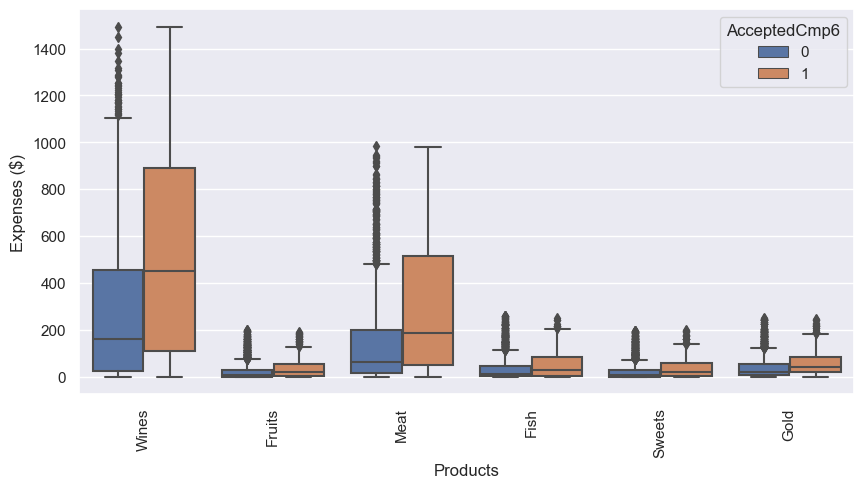

In [27]:
plt.subplots(figsize=(10, 5))
sns.boxplot(x='Products', y='Expenses', hue='AcceptedCmp6', data=byspent)
plt.xticks(rotation='vertical')
plt.ylabel('Expenses ($)')
plt.xlabel('Products')
plt.show();
#obervation: the most expenses are spent on meat and wines. 

In [28]:
# use pd.cut() to separate ages into groups
df['Age_group'] = pd.cut(df.Age, [20,30,40,50,60,70,80],
                         labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

In [29]:
# by age
byage = df.groupby(['Age_group']).mean()

In [30]:
# young people spend more on meat and senior people spend more on wines...
byage[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']] 

,Wines,Fruits,Meat,Fish,Sweets,Gold
Age_group,,,,,,
20-30,272.440000,31.955000,215.870000,42.330000,31.245000,44.320000
30-40,254.931947,26.035917,142.994329,38.296786,26.882798,42.132325
40-50,290.547256,24.100610,150.288110,32.138720,24.922256,39.937500
50-60,371.387665,29.165198,178.958150,41.726872,28.321586,48.178414
60-70,393.061433,27.317406,196.764505,43.440273,30.300341,54.122867
70-80,620.333333,40.866667,286.066667,81.866667,28.866667,22.466667


In [31]:
byage.index

CategoricalIndex(['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'], categories=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'], ordered=True, dtype='category', name='Age_group')

### A visual Summary

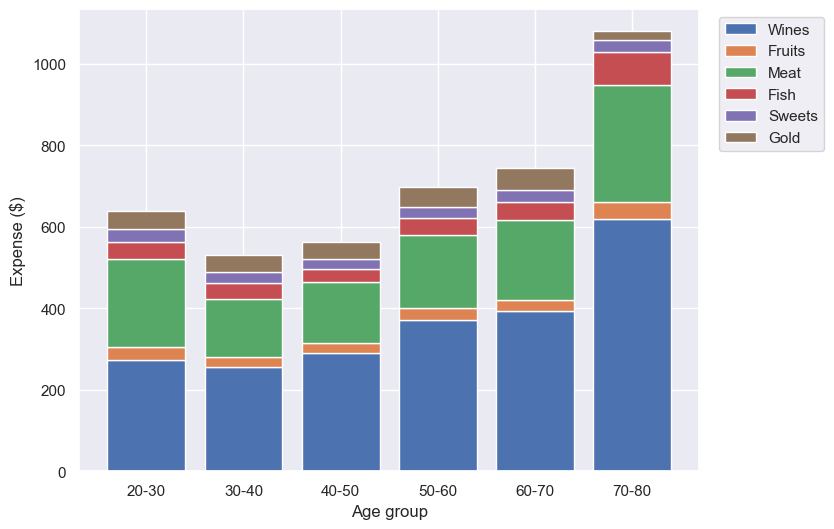

In [32]:
import matplotlib.ticker as mticker

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(byage.index, byage['Wines'], label='Wines')
ax.bar(byage.index, byage['Fruits'], bottom=byage['Wines'], label='Fruits')
ax.bar(byage.index, byage['Meat'], bottom=byage['Wines'] + byage['Fruits'], label='Meat')
ax.bar(byage.index, byage['Fish'], bottom=byage['Wines'] + byage['Fruits'] 
       + byage['Meat'], label='Fish')
ax.bar(byage.index, byage['Sweets'], bottom=byage['Wines'] + byage['Fruits'] 
       + byage['Meat'] + byage['Fish'], label='Sweets')
ax.bar(byage.index, byage['Gold'], bottom=byage['Wines'] + byage['Fruits'] 
       + byage['Meat'] + byage['Fish'] + byage['Sweets'], label='Gold')

#ax.set_xticklabels(byage.index, rotation=90)
ax.set_xlabel('Age group')
ax.set_ylabel('Expense ($)')
ax.legend(bbox_to_anchor= (1.02, 1))
plt.show();

 - observation: 
     on average, senior customers (70-80) spent the most and the mid-aged people spent the least.

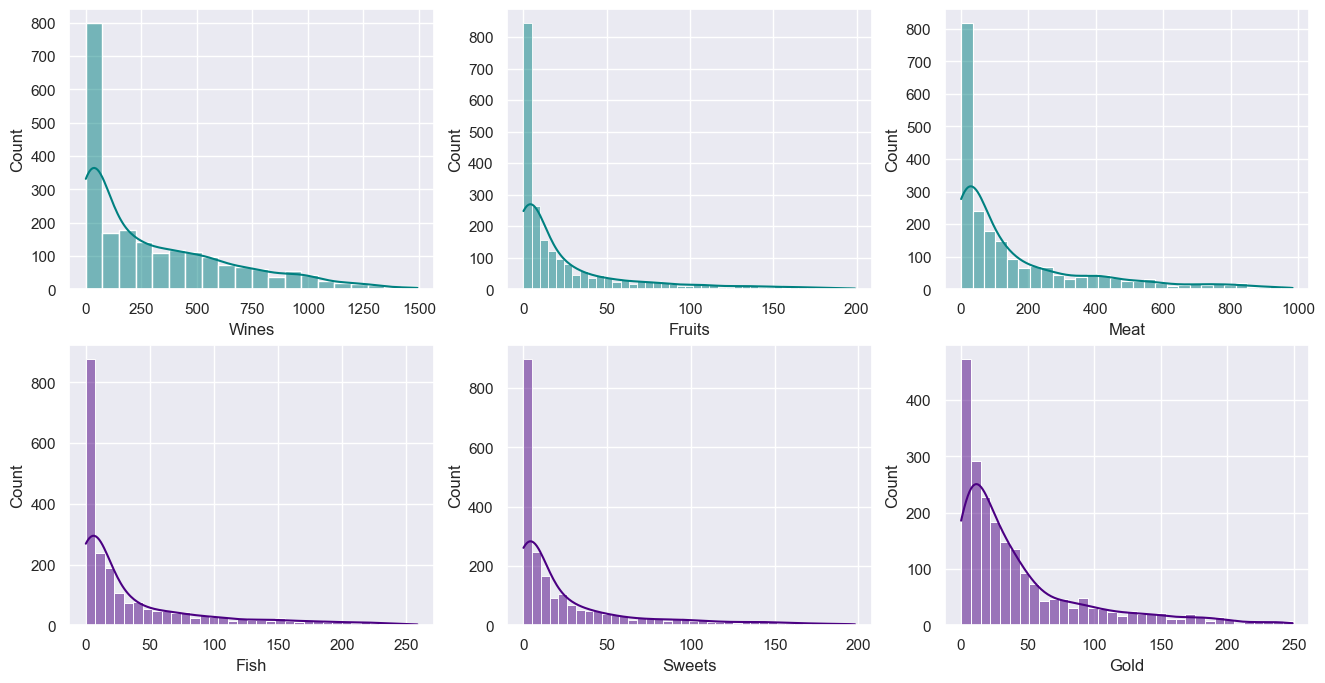

In [33]:
fig, axs = plt.subplots(2, 3, figsize=(16,8)) 

sns.histplot(data=df, x="Wines", kde=True, color="teal", ax=axs[0, 0])
sns.histplot(data=df, x="Fruits", kde=True, color="teal", ax=axs[0, 1])
sns.histplot(data=df, x="Meat", kde=True, color="teal", ax=axs[0, 2])
sns.histplot(data=df, x="Fish", kde=True, color="indigo", ax=axs[1, 0])
sns.histplot(data=df, x="Sweets", kde=True, color="indigo", ax=axs[1, 1])
sns.histplot(data=df, x="Gold", kde=True, color="indigo", ax=axs[1, 2])

plt.show()

- We could see that the data is right skewed for most of the products (the mean value is larger than median value (50th percentile: 50%)

In [34]:
To_Drop = ['Year_Birth', 'Kidhome', 'Teenhome', 'current_day']
df.drop(columns=To_Drop, axis=1, inplace=True)

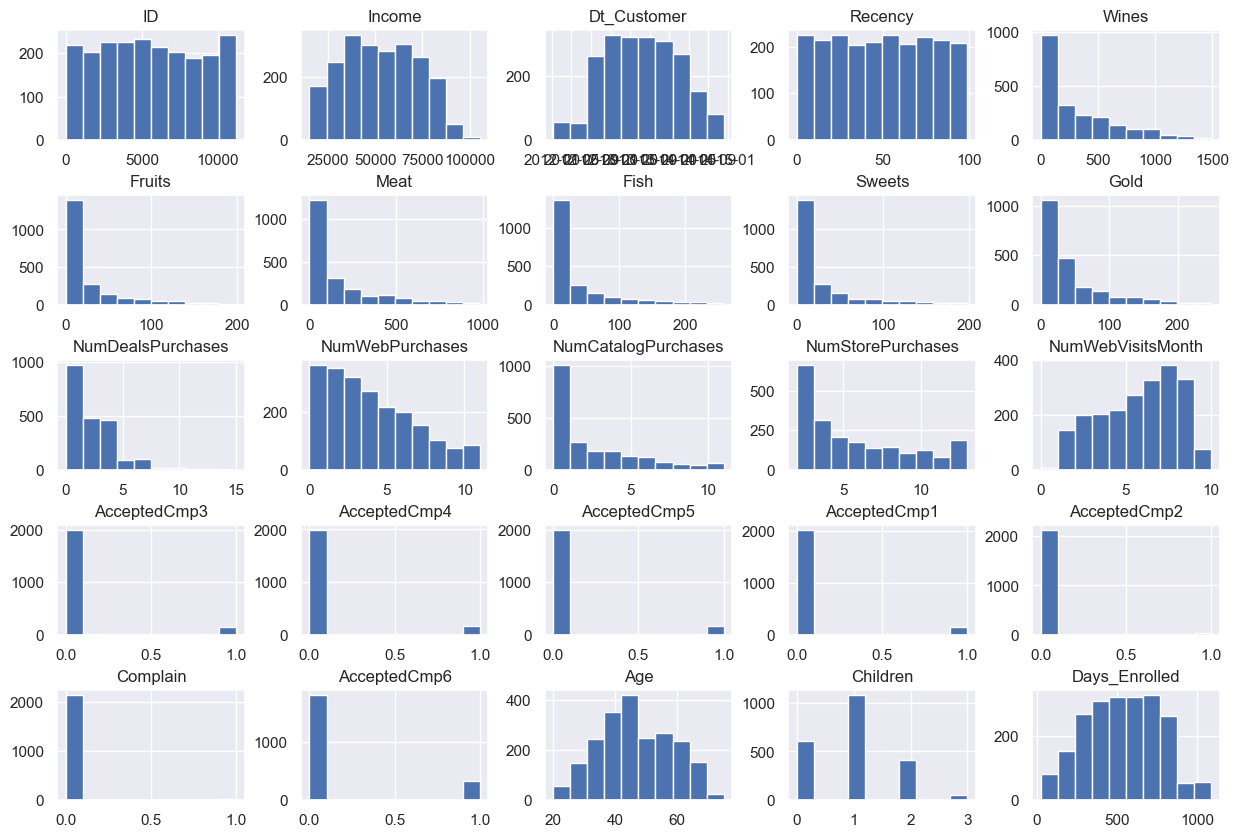

In [35]:
# Visualizing and retrieving the relational information between independent variables.
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5); # with an argument hspace=0.5 to adjust the spacing
plt.show();

### Saving data

In [36]:
print("The cleaned dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))

The cleaned dataset has 2152 rows and 28 columns


In [37]:
# save the data to a new csv file
datapath = './Data'
save_file(df, '01_cleaned_data.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "./Data\01_cleaned_data.csv"


**Conclusions:**
   - missing values are filled in with statistic values (median).
   - categories within the features are organized and cleaned.
   - new features are created.